In [1]:
#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Python library for Vidualization
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('C:/DataSets/DataSets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df.shape


(200, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [16]:

X= df.iloc[:, [3,4]].values


In [20]:
from sklearn.cluster import KMeans
wcss=[]
#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

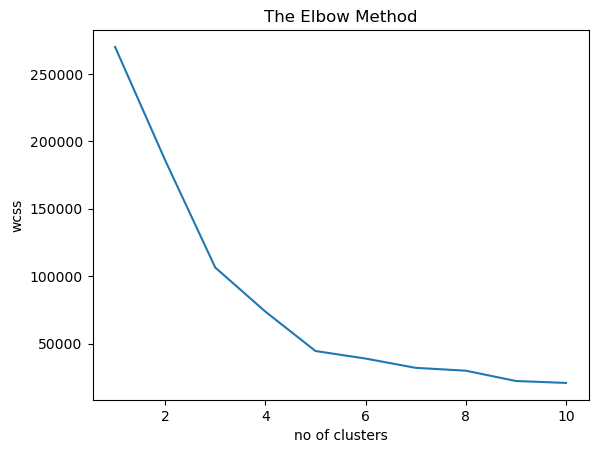

In [22]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [24]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

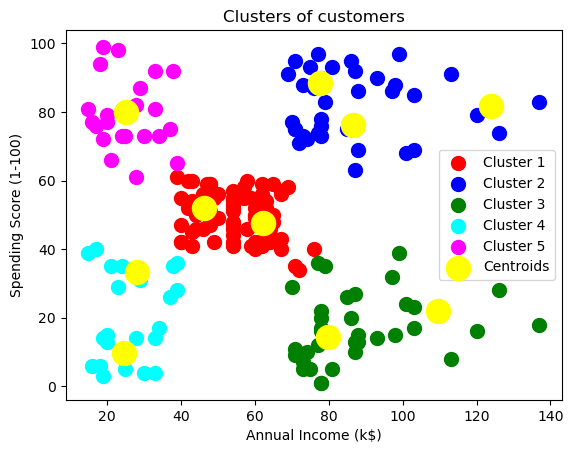

In [26]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red',label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue',label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green',label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan',label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta',label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
# Define features as the columns of your DataFrame (except the target variable)
features = df.drop('Age', axis=1) # Assuming 'prices' is your target variable
# Now you can split your data into training and testing sets
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

In [30]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [32]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'gender' is the column with categorical data
le = LabelEncoder()
6
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
scaled_features = X_train_scaled
scaled_features = np.vstack((X_train_scaled, X_test_scaled))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

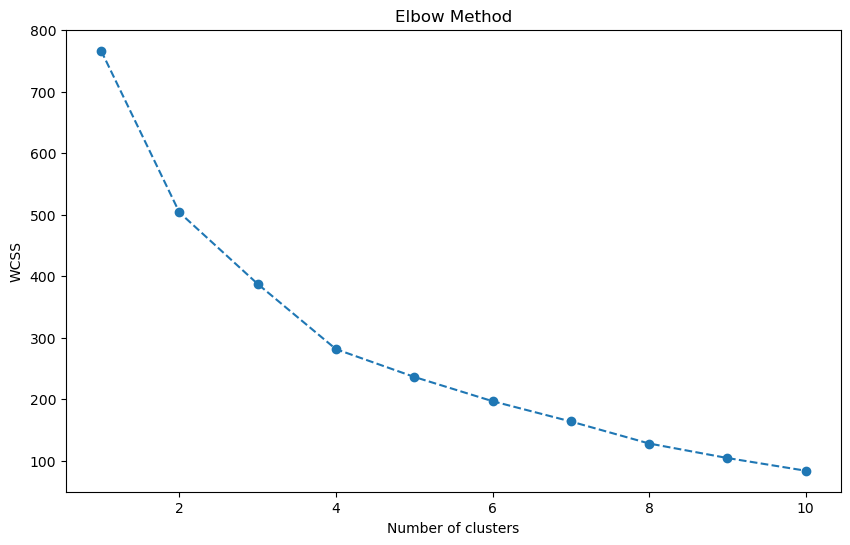

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within-cluster sum of squares
plt.show()

In [40]:
optimal_clusters = 5

In [42]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300,n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)

In [44]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300,n_init=10, random_state=0)
train_cluster_labels = kmeans.fit_predict(X_train_scaled)

In [46]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300,n_init=10, random_state=0)
kmeans.fit(X_train_scaled)
# Predict cluster labels for the training data
train_cluster_labels = kmeans.labels_
# Predict cluster labels for the test data
test_cluster_labels = kmeans.predict(X_test_scaled)

In [48]:
X_train['Cluster'] = train_cluster_labels
X_test['Cluster'] = test_cluster_labels

In [50]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300,n_init=10, random_state=0)
kmeans.fit(X_train_scaled)
# Predict cluster labels for the training data
train_cluster_labels = kmeans.labels_
# Predict cluster labels for the test data
test_cluster_labels = kmeans.predict(X_test_scaled)
# Print the count of customers in each cluster
print("Training Data:")
print(pd.Series(train_cluster_labels).value_counts())
print("\nTest Data:")
print(pd.Series(test_cluster_labels).value_counts())

Training Data:
1    48
2    35
0    34
3    26
4    17
Name: count, dtype: int64

Test Data:
3    12
1    11
2    10
0     5
4     2
Name: count, dtype: int64


In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [54]:
kmeans.cluster_centers_

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

In [58]:
kmeans.inertia_

181363.595959596

In [60]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2,random_state=0)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels_n2 = sum(y_kmeans == labels)
print("Result: %d out of %d samples were correctly labeled." %(correct_labels_n2, y_kmeans.size))
accuracy_n2 = correct_labels_n2/float(y_kmeans.size)
print('Accuracy score: {0:0.2f}'. format(accuracy_n2))

Result: 36 out of 200 samples were correctly labeled.
Accuracy score: 0.18


In [62]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=3,random_state=0)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels_n3 = sum(y_kmeans == labels)
print("Result: %d out of %d samples were correctly labeled." %(correct_labels_n3, y_kmeans.size))
accuracy_n3 = correct_labels_n3/float(y_kmeans.size)
print('Accuracy score: {0:0.2f}'. format(accuracy_n3))

Result: 152 out of 200 samples were correctly labeled.
Accuracy score: 0.76


In [64]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=4,random_state=0)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels_n4 = sum(y_kmeans == labels)
print("Result: %d out of %d samples were correctly labeled." %(correct_labels_n4, y_kmeans.size))
accuracy_n4 = correct_labels_n4/float(y_kmeans.size)
print('Accuracy score: {0:0.2f}'. format(accuracy_n4))

Result: 175 out of 200 samples were correctly labeled.
Accuracy score: 0.88


In [66]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=5,random_state=0)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels_n5 = sum(y_kmeans == labels)
print("Result: %d out of %d samples were correctly labeled." %(correct_labels_n5, y_kmeans.size))
accuracy_n5 = correct_labels_n5/float(y_kmeans.size)
print('Accuracy score: {0:0.2f}'. format(accuracy_n5))

Result: 200 out of 200 samples were correctly labeled.
Accuracy score: 1.00


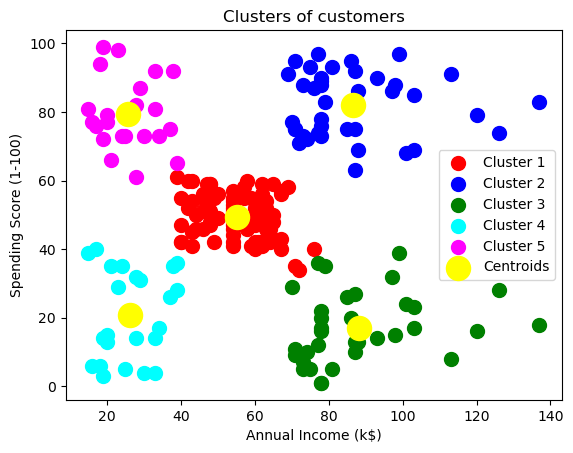

In [68]:
#Visualizing all the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red',label= 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue',label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green',label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan',label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta',label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

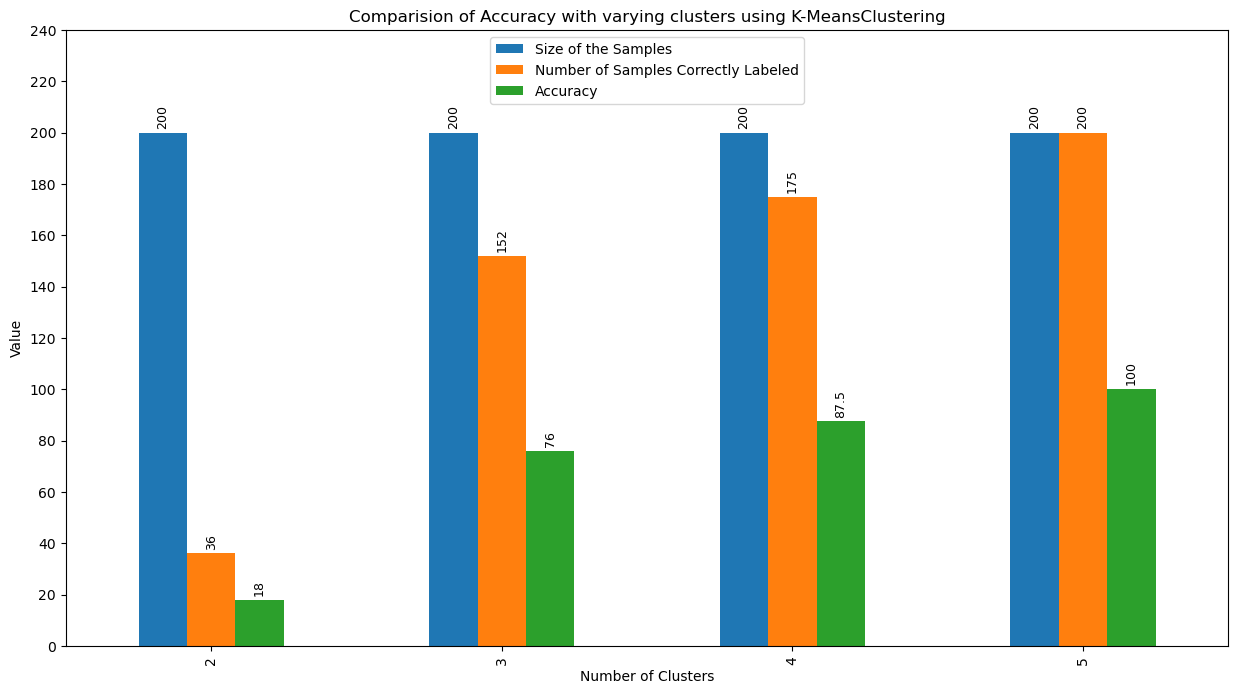

In [72]:
data = pd.DataFrame({
'Number of Clusters': [2, 3, 4, 5],
'Size of the Samples': [y_kmeans.size, y_kmeans.size, y_kmeans.size,y_kmeans.size],
'Number of Samples Correctly Labeled': [correct_labels_n2,correct_labels_n3, correct_labels_n4, correct_labels_n5],
'Accuracy': [accuracy_n2*100, accuracy_n3*100, accuracy_n4*100,accuracy_n5*100]})
# Plotting the graph
axs = pd.concat([data['Size of the Samples'],data['Number of Samples Correctly Labeled'],data['Accuracy']], axis=1).plot.bar(figsize=(15, 8))
axs.set_title('Comparision of Accuracy with varying clusters using K-MeansClustering')
axs.set_xlabel('Number of Clusters')
axs.set_ylabel('Value')
axs.set_xticklabels(data['Number of Clusters'])
for container in axs.containers:
    axs.bar_label(container, padding=3, rotation=90, fontsize=9)
plt.yticks(np.arange(0, 250, step=20))
#plt.yticks(np.arange(0, 1.1, step=0.1))
#axs.legend(loc='upper center', ncols=3)
axs.legend(loc='upper center')
plt.show()